<a href="https://colab.research.google.com/github/Dasika-Vaishnavi/Wave2Web_forecast/blob/main/Wave2Web_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [10]:
!pip install pandas
!pip install prophet

# 0. Install and import dependencies

In [16]:
import pandas as pd
from prophet import Prophet

# 1. Read and process data

In [17]:
df = pd.read_csv('/content/picchi_peaks.csv')
df['Year'] = df['FLOW_DATE'].apply(lambda x: str(x)[-4:])
df['Month'] = df['FLOW_DATE'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['FLOW_DATE'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Day']+'-'+df['Year'])
df.drop(['FLOW_DATE', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.head()

,y,ds
0,46.42,2011-01-01
1,46.54,2011-01-01
2,46.64,2011-01-01
3,46.69,2011-01-01
4,46.70,2011-01-01


# 2. Train the model

In [18]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# 3. Forecasting the data

In [19]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-03,46.058854,45.443722,70.289092,46.058854,46.058854,11.620017,11.620017,11.620017,1.036155,1.036155,1.036155,0.193177,0.193177,0.193177,10.390685,10.390685,10.390685,0.0,0.0,0.0,57.678871
1,2010-12-03,42.335766,37.541547,61.859435,42.335766,42.335766,7.113038,7.113038,7.113038,1.036155,1.036155,1.036155,0.193177,0.193177,0.193177,5.883706,5.883706,5.883706,0.0,0.0,0.0,49.448804
2,2011-01-01,41.149287,34.205339,58.162321,41.149287,41.149287,4.769734,4.769734,4.769734,1.036155,1.036155,1.036155,0.076082,0.076082,0.076082,3.657498,3.657498,3.657498,0.0,0.0,0.0,45.919021
3,2011-01-02,41.108374,34.185116,57.728482,41.108374,41.108374,4.555793,4.555793,4.555793,1.036155,1.036155,1.036155,0.305051,0.305051,0.305051,3.214588,3.214588,3.214588,0.0,0.0,0.0,45.664167
4,2011-01-03,41.067461,32.948989,57.335831,41.067461,41.067461,4.011792,4.011792,4.011792,1.036155,1.036155,1.036155,0.351497,0.351497,0.351497,2.624141,2.624141,2.624141,0.0,0.0,0.0,45.079253


# 4. Outlier

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


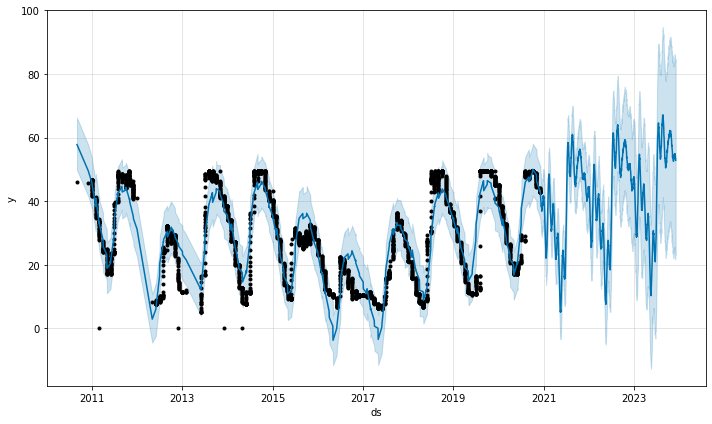

In [20]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

### The trend forecast seems reasonable, but the uncertainty intervals seem way too wide. Prophet is able to handle the outliers in the history, but only by fitting them with trend changes. The uncertainty model then expects future trend changes of similar magnitude.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


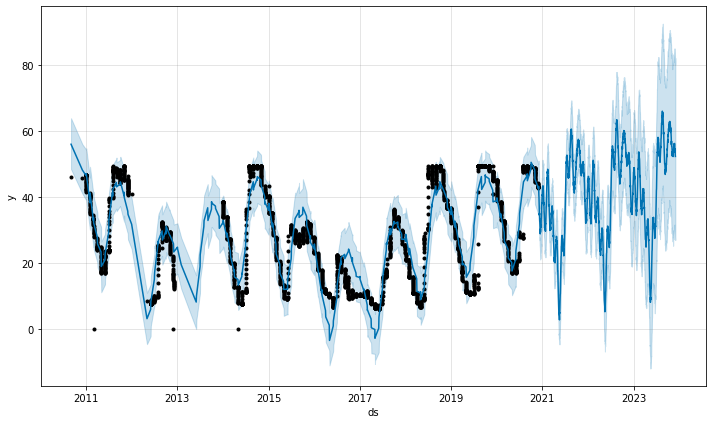

In [21]:
df.loc[(df['ds'] > '2013-01-01') & (df['ds'] < '2014-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


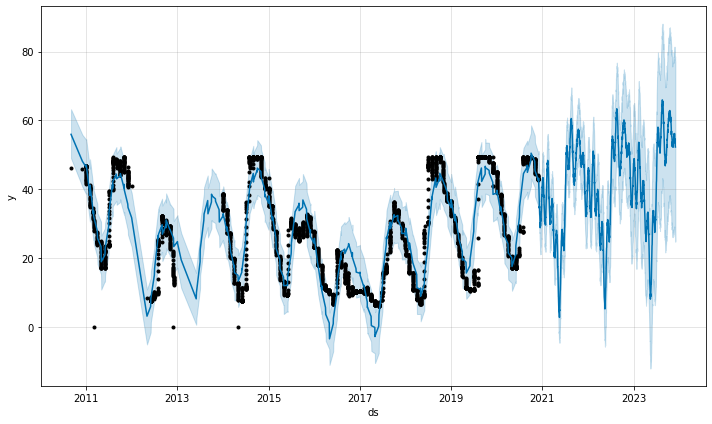

In [22]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


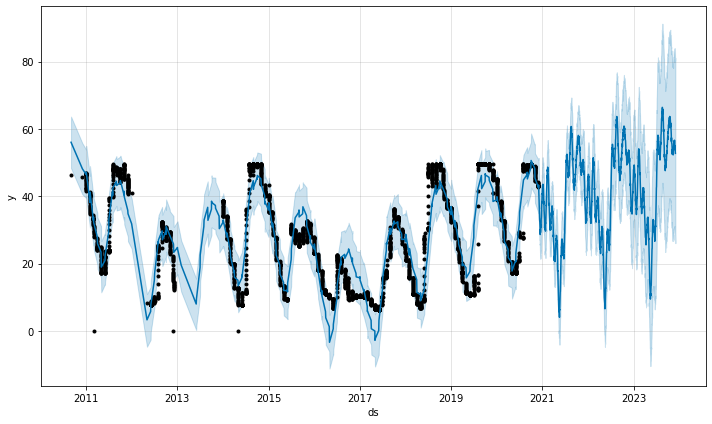

In [23]:
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))